In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Shrink our data down by dividing every single pixels value by 255

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
print(train_images[0])

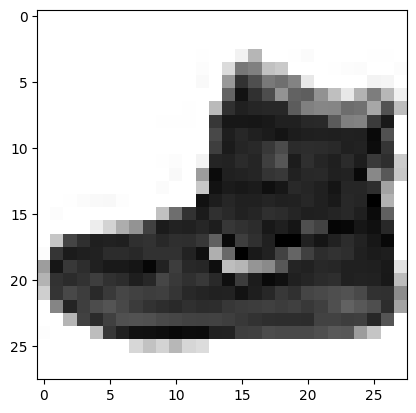

In [7]:
plt.imshow(train_images[0], cmap= plt.cm.binary)
plt.show()

### Creating the model

We will need to Flatten the data, Flattening the data in the context of image classification refers to converting a two-dimensional (2D) array, typically representing an image, into a one-dimensional (1D) array.

In an image classification task, each image is typically represented as a matrix of pixel values. For instance, a colored image might have three channels (Red, Green, Blue), and each channel is a 2D array of pixel values representing the intensity of that color at each pixel location.

Flattening the data involves unraveling this 2D structure into a single row or a single array, effectively transforming the matrix of pixel values into a long sequence of numbers. This process preserves the pixel information but removes the spatial relationships between pixels, transforming the image into a format suitable for feeding into certain machine learning models or algorithms that require a 1D input.

For example, if you have an image with dimensions 32x32x3 (32 pixels width, 32 pixels height, and 3 channels for RGB), flattening the image would convert this into a 1D array of size 32x32x3 = 3072 elements. Each pixel's RGB values would be concatenated together into a long sequence, forming the input data for the machine learning model

In [8]:
model = keras.Sequential([
    # Flattening the data here, meaning we will have 784 input neurons since 28x28=784.
    keras.layers.Flatten(input_shape=(28,28)), # Input layers
    
    # 128 hidden layers neurons, you chose num of hidden layers maybe 15% or 20% of the input layers
    # size, you can play with it, how many suits best for you.
    # Activation function will be Rectified linear unit (relu), you can pick different one.
    keras.layers.Dense(128, activation="relu"), # Hidden layers
    
    # 10 neuros since our label is from 0 to 9, each neurons represent weights of the label.
    # The highest label will be the one to predict.
    # Activation neuros will be softmax, it will pick all output layers weights and add it upto 1
    keras.layers.Dense(10, activation="softmax") # Output layer
])

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2764 - accuracy: 0.8986
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2657 - accuracy: 0.9011
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2554 - accuracy: 0.9045
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2469 - accuracy: 0.9063
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2364 - accuracy: 0.9114


In [11]:
# Testing and Checking the Accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Tested Accuracy : ", test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.3464 - accuracy: 0.8747
Tested Accuracy :  0.8747000098228455


### Predicting

In [12]:
prediction = model.predict(test_images)
print(prediction)

# Our output layer is 10 neurons so we are actually getting output of 10 different values
# And these values are representing how much the model thinks that each pic is a certain class

313/313 [==============================] - 2s 4ms/step
[[1.40939246e-05 2.70518168e-08 2.82396343e-07 ... 1.53058231e-01
  2.37829340e-06 8.15979123e-01]
 [7.69851904e-05 7.77100162e-10 9.91499603e-01 ... 1.87589549e-15
  1.31321256e-08 4.12044015e-13]
 [3.60391641e-06 9.99995947e-01 1.99632240e-08 ... 1.73096260e-18
  1.23623320e-10 1.09747145e-13]
 ...
 [5.37632732e-03 5.01715185e-08 1.41733850e-03 ... 1.58175215e-08
  9.85592902e-01 1.99780067e-10]
 [3.67247139e-07 9.99952674e-01 2.44864449e-08 ... 1.06418949e-13
  3.75114517e-09 1.37376527e-10]
 [1.53028868e-05 5.28671762e-07 3.78893819e-05 ... 1.31997035e-03
  1.39025811e-04 1.25434226e-05]]


In [13]:
prediction[0]
# As you can see, it gives 10 outputs of the 10 different output neurons 
# and each value represent the weight

array([1.4093925e-05, 2.7051817e-08, 2.8239634e-07, 3.0674315e-08,
       5.6364308e-07, 3.0927066e-02, 1.8266086e-05, 1.5305823e-01,
       2.3782934e-06, 8.1597912e-01], dtype=float32)

### Getting the highest number and say that is the Predicted value

In [14]:
# argmax will return as the largest value and returns its index
np.argmax(prediction[0])

9

### Return class Name instead of index

In [15]:
# Now, if you want to return the class name instead of the index, just do this
print(class_names[np.argmax(prediction[0])])

Ankle boot


### Checking Actual value and Predicted Value

In [16]:
for i in range(5):
    print("Actual Value : " + class_names[test_labels[i]])
    print("Predicted Value : " + class_names[np.argmax(prediction[i])])

Actual Value : Ankle boot
Predicted Value : Ankle boot
Actual Value : Pullover
Predicted Value : Pullover
Actual Value : Trouser
Predicted Value : Trouser
Actual Value : Trouser
Predicted Value : Trouser
Actual Value : Shirt
Predicted Value : Shirt


### Display images, actual value and predicted value using Matplotlib

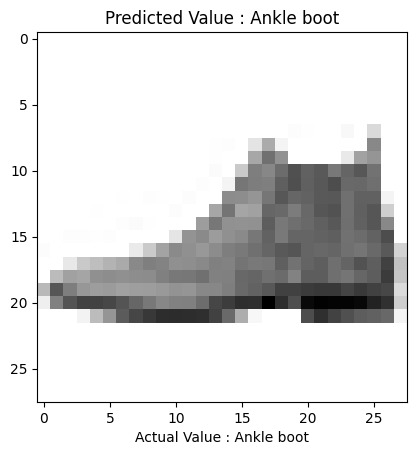

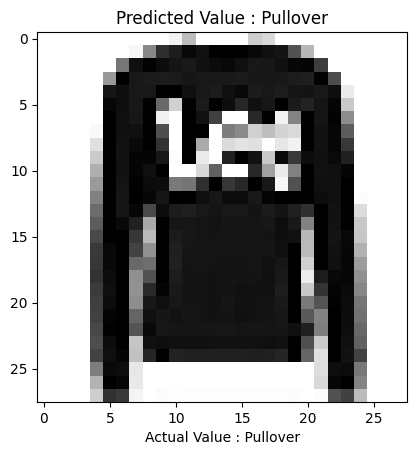

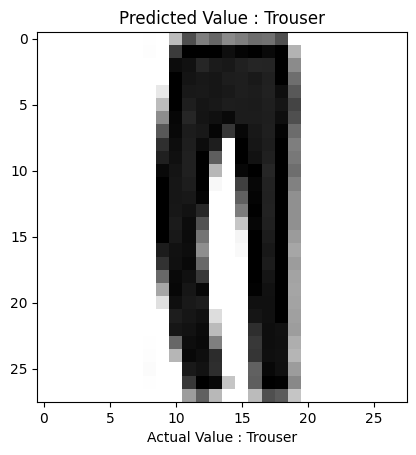

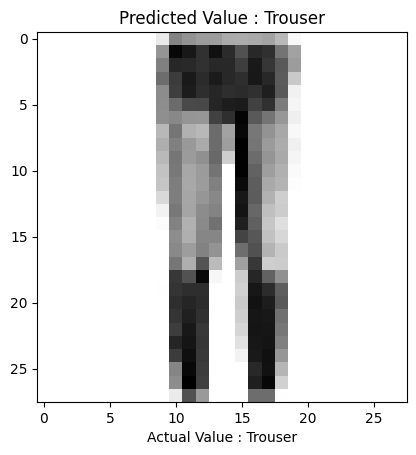

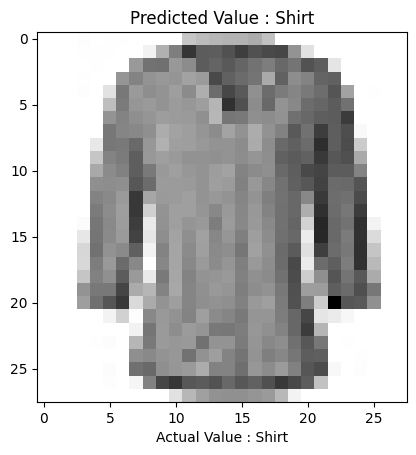

In [17]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual Value : " + class_names[test_labels[i]])
    plt.title("Predicted Value : " + class_names[np.argmax(prediction[i])])
    plt.show()

### Checking individual image

In [18]:
predict = model.predict(np.array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.99923106e-04, 1.03037293e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.68935025e-04, 5.84390619e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.23029604e-04,
        1.84544406e-03, 3.21414840e-03, 3.47558631e-03, 3.79853902e-03,
        3.64475202e-03, 3.92156863e-03, 3.92156863e-03, 3.92156863e-03,
        3.79853902e-03, 3.66013072e-03, 3.61399462e-03, 2.64513649e-03,
        1.10726644e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.10688197e-03, 3.67550942e-03,
        3.87543253e-03, 3.73702422e-03, 3.59861592e-03, 3.52172241e-03,
        3.66013072e-03, 3.75240292e-03, 3.78316032e-03, 3.69088812e-03,
        3.53710111e-03, 3.56785852e-03, 3.67550942e-03, 3.81391772e-03,
        3.86005383e-03, 2.98346790e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.56862745e-03, 3.92156863e-03, 3.55247982e-03,
        3.50634371e-03, 3.49096501e-03, 3.50634371e-03, 3.58323722e-03,
        3.53710111e-03, 3.53710111e-03, 3.52172241e-03, 3.50634371e-03,
        3.56785852e-03, 3.56785852e-03, 3.55247982e-03, 3.49096501e-03,
        3.44482891e-03, 3.87543253e-03, 2.75278739e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.58323722e-03, 3.70626682e-03, 3.52172241e-03,
        3.55247982e-03, 3.92156863e-03, 3.92156863e-03, 3.66013072e-03,
        3.55247982e-03, 3.49096501e-03, 3.66013072e-03, 3.78316032e-03,
        3.50634371e-03, 3.53710111e-03, 3.49096501e-03, 3.59861592e-03,
        3.61399462e-03, 3.52172241e-03, 3.70626682e-03, 3.07574010e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.81391772e-03, 3.70626682e-03, 3.55247982e-03,
        3.92156863e-03, 2.29142637e-03, 7.22798923e-04, 3.87543253e-03,
        3.50634371e-03, 3.92156863e-03, 3.72164552e-03, 3.32179931e-03,
        3.66013072e-03, 3.56785852e-03, 3.92156863e-03, 3.50634371e-03,
        3.38331411e-03, 3.59861592e-03, 3.84467512e-03, 8.30449827e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.92156863e-03, 3.69088812e-03, 3.56785852e-03,
        3.92156863e-03, 2.30680507e-04, 0.00000000e+00, 3.92156863e-03,
        3.64475202e-03, 2.93733180e-03, 0.00000000e+00, 0.00000000e+00,
        3.29104191e-03, 3.92156863e-03, 1.99923106e-04, 1.89158016e-03,
        3.92156863e-03, 3.59861592e-03, 3.87543253e-03, 1.75317186e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.22722030e-05, 3.92156863e-03, 3.66013072e-03, 3.67550942e-03,
        3.92156863e-03, 2.72202999e-03, 0.00000000e+00, 3.92156863e-03,
        3.92156863e-03, 0.00000000e+00, 1.99923106e-03, 1.78392926e-03,
        7.22798923e-04, 9.99615532e-04, 6.61284121e-04, 5.69011918e-04,
        3.92156863e-03, 3.62937332e-03, 3.82929642e-03, 2.49134948e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.92118416e-04, 3.92156863e-03, 3.62937332e-03, 3.76778162e-03,
        3.92156863e-03, 3.13725490e-03, 0.00000000e+00, 3.92156863e-03,
        1.29181084e-03, 0.00000000e+00, 5.69011918e-04, 4.30603614e-04,
        4.76739715e-04, 0.00000000e+00, 3.84467512e-04, 1.99923106e-04,
        3.92156863e-03, 3.62937332e-03, 3.82929642e-03, 3.06036140e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.15071126e-04, 3.92156863e-03, 3.62937332e-03, 3.84467512e-03,
        3.84467512e-03, 3.55247982e-03, 3.07574010e-05, 3.92156863e-03,
        3.22952710e-04, 0.00000000e+00, 3.39869281e-03, 3.92156863e-03,
        3.62937332e-03, 8.30449827e-04, 3.76778162e-03, 3.04498270e-03,
        3.73702422e-03, 3.66013072e-03, 3.76778162e-03, 3.42945021e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.23029604e-03, 3.92156863e-03, 3.64475202e-03, 3.84467512e-03,
        3.69088812e-03, 3.92156863e-03, 0.00000000e+00, 0.00000000e+00,
        5.99769319e-04, 2.41445598e-03, 0.00000000e+00, 0.00000000e+00,
        3.30642061e-03, 1.44559785e-03, 3.07574010e-04, 1.93771626e-03,
        3.92156863e-03, 3.64475202e-03, 3.67550942e-03, 3.84467512e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.55324875e-03, 3.92156863e-03, 3.61399462e-03, 3.89081123e-03,
        3.75240292e-03, 3.73702422e-03, 2.04536717e-03, 2.12226067e-03,
        3.19876970e-03, 3.92156863e-03, 3.09111880e-03, 3.29104191e-03,
        3.92156863e-03, 3.53710111e-03, 1.07650903e-04, 2.67589389e-03,
        3.92156863e-03, 3.69088812e-03, 3.66013072e-03, 3.92156863e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.93771626e-03, 3.92156863e-03, 3.58323722e-03, 3.92156863e-03,
        3.81391772e-03, 3.58323722e-03, 3.92156863e-03, 3.92156863e-03,
        3.69088812e-03, 3.56785852e-03, 3.73702422e-03, 3.73702422e-03,
        3.55247982e-03, 3.86005383e-03, 3.92156863e-03, 3.92156863e-03,
        3.90618993e-03, 3.73702422e-03, 3.66013072e-03, 3.92156863e-03,
        4.61361015e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.26066897e-03, 3.92156863e-03, 3.58323722e-03, 3.82929642e-03,
        2.78354479e-03, 3.73702422e-03, 3.49096501e-03, 3.44482891e-03,
        3.53710111e-03, 3.59861592e-03, 3.53710111e-03, 3.53710111e-03,
        3.61399462e-03, 3.50634371e-03, 3.61399462e-03, 3.41407151e-03,
        3.18339100e-03, 3.92156863e-03, 3.62937332e-03, 3.92156863e-03,
        5.38254517e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.50672818e-03, 3.92156863e-03, 3.76778162e-03, 3.39869281e-03,
        1.32256824e-03, 3.92156863e-03, 3.58323722e-03, 3.58323722e-03,
        3.61399462e-03, 3.62937332e-03, 3.59861592e-03, 3.59861592e-03,
        3.59861592e-03, 3.56785852e-03, 3.72164552e-03, 3.55247982e-03,
        1.92233756e-03, 3.92156863e-03, 3.62937332e-03, 3.92156863e-03,
        8.45828527e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.78354479e-03, 3.90618993e-03, 3.92156863e-03, 3.07574010e-03,
        1.06113033e-03, 3.92156863e-03, 3.50634371e-03, 3.56785852e-03,
        3.59861592e-03, 3.61399462e-03, 3.59861592e-03, 3.59861592e-03,
        3.58323722e-03, 3.61399462e-03, 3.70626682e-03, 3.64475202e-03,
        1.07650903e-03, 3.92156863e-03, 3.61399462e-03, 3.78316032e-03,
        8.76585928e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.02960400e-03, 3.79853902e-03, 3.92156863e-03, 2.89119569e-03,
        1.69165705e-03, 3.92156863e-03, 3.44482891e-03, 3.58323722e-03,
        3.59861592e-03, 3.59861592e-03, 3.59861592e-03, 3.59861592e-03,
        3.59861592e-03, 3.59861592e-03, 3.69088812e-03, 3.89081123e-03,
        1.06113033e-03, 3.92156863e-03, 3.62937332e-03, 3.81391772e-03,
        1.18415994e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.07574010e-03, 3.78316032e-03, 3.92156863e-03, 2.29142637e-03,
        2.22991157e-03, 3.92156863e-03, 3.42945021e-03, 3.61399462e-03,
        3.59861592e-03, 3.61399462e-03, 3.61399462e-03, 3.61399462e-03,
        3.59861592e-03, 3.64475202e-03, 3.58323722e-03, 3.92156863e-03,
        7.22798923e-04, 3.92156863e-03, 3.67550942e-03, 3.82929642e-03,
        1.50711265e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.13725490e-03, 3.73702422e-03, 3.92156863e-03, 1.70703576e-03,
        2.66051519e-03, 3.92156863e-03, 3.49096501e-03, 3.61399462e-03,
        3.61399462e-03, 3.62937332e-03, 3.61399462e-03, 3.61399462e-03,
        3.61399462e-03, 3.67550942e-03, 3.52172241e-03, 3.92156863e-03,
        2.92195309e-04, 3.49096501e-03, 3.78316032e-03, 3.82929642e-03,
        1.69165705e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.01422530e-03, 3.69088812e-03, 3.92156863e-03, 1.67627835e-03,
        3.27566321e-03, 3.84467512e-03, 3.52172241e-03, 3.61399462e-03,
        3.61399462e-03, 3.62937332e-03, 3.61399462e-03, 3.64475202e-03,
        3.62937332e-03, 3.64475202e-03, 3.47558631e-03, 3.92156863e-03,
        8.45828527e-04, 3.12187620e-03, 3.86005383e-03, 3.76778162e-03,
        1.84544406e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.95271050e-03, 3.73702422e-03, 3.92156863e-03, 1.75317186e-03,
        3.56785852e-03, 3.69088812e-03, 3.56785852e-03, 3.61399462e-03,
        3.61399462e-03, 3.62937332e-03, 3.59861592e-03, 3.64475202e-03,
        3.62937332e-03, 3.61399462e-03, 3.52172241e-03, 3.92156863e-03,
        2.06074587e-03, 2.62975779e-03, 3.87543253e-03, 3.75240292e-03,
        2.10688197e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.90657439e-03, 3.86005383e-03, 3.92156863e-03, 2.36831988e-03,
        3.66013072e-03, 3.58323722e-03, 3.62937332e-03, 3.59861592e-03,
        3.61399462e-03, 3.62937332e-03, 3.61399462e-03, 3.66013072e-03,
        3.62937332e-03, 3.61399462e-03, 3.56785852e-03, 3.92156863e-03,
        2.55286428e-03, 1.92233756e-03, 3.92156863e-03, 3.73702422e-03,
        2.18377547e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.81430219e-03, 3.87543253e-03, 3.92156863e-03, 2.62975779e-03,
        3.79853902e-03, 3.56785852e-03, 3.59861592e-03, 3.59861592e-03,
        3.58323722e-03, 3.58323722e-03, 3.56785852e-03, 3.59861592e-03,
        3.58323722e-03, 3.59861592e-03, 3.58323722e-03, 3.69088812e-03,
        3.42945021e-03, 1.96847366e-03, 3.92156863e-03, 3.72164552e-03,
        2.32218378e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.73740869e-03, 3.73702422e-03, 3.92156863e-03, 8.76585928e-04,
        3.66013072e-03, 3.70626682e-03, 3.66013072e-03, 3.66013072e-03,
        3.66013072e-03, 3.64475202e-03, 3.62937332e-03, 3.64475202e-03,
        3.64475202e-03, 3.69088812e-03, 3.64475202e-03, 3.90618993e-03,
        2.70665129e-03, 7.99692426e-04, 3.92156863e-03, 3.67550942e-03,
        2.41445598e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.89119569e-03, 3.69088812e-03, 3.84467512e-03, 9.53479431e-04,
        3.35255671e-03, 3.92156863e-03, 3.38331411e-03, 3.41407151e-03,
        3.41407151e-03, 3.41407151e-03, 3.42945021e-03, 3.42945021e-03,
        3.44482891e-03, 3.41407151e-03, 3.35255671e-03, 3.92156863e-03,
        2.36831988e-03, 4.92118416e-04, 3.92156863e-03, 3.62937332e-03,
        2.89119569e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.99923106e-03, 3.76778162e-03, 3.72164552e-03, 3.69088812e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.22875817e-04, 3.72164552e-03, 3.75240292e-03,
        2.07612457e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.16878124e-03, 3.92156863e-03, 3.82929642e-03, 3.38331411e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.99769319e-04, 3.82929642e-03, 3.92156863e-03,
        1.89158016e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.53556324e-04, 3.15263360e-03, 3.02960400e-03, 1.69165705e-04,
        0.00000000e+00, 6.15148020e-05, 1.53787005e-05, 3.07574010e-05,
        3.07574010e-05, 3.07574010e-05, 3.07574010e-05, 3.07574010e-05,
        3.07574010e-05, 3.07574010e-05, 3.07574010e-05, 4.61361015e-05,
        0.00000000e+00, 4.61361015e-05, 2.67589389e-03, 2.90657439e-03,
        1.03037293e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))
plt.imshow(test_images[9])
plt.show()
print("Actual : " + class_names[test_labels[9]])
print("Predicted : " + class_names[np.argmax(predict)])

InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\User\AppData\Local\Temp\ipykernel_4260\2474747773.py", line 1, in <module>

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [28,28], In[1]: [784,128]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_predict_function_42439]

In [ ]:
test_images[1]